In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import time
from tqdm import tqdm

from statsmodels.stats.weightstats import ztest as ztest

import warnings
warnings.filterwarnings("ignore")

_интерес к вопросу об ущемлении чернокожих игроков в NBA, возник после нашумевшего инцедента с одним американских журналистом, который утверждал, что MVP прошлого сезона (по совместительству белый игроко из Сербии - Никола Йокич), номирован второй год подряд не из-за своей невероятной игры, а только лишь потому что является белым, и голоса нечестно распределены между ним и вторым лидером в гонке за звание MVP - Джоэлем Эмбидом (по совместительству темнокожим игроком с французским паспортом, родом из Камеруна), но после некоторых манипуляций, с которыми вы ознакомитесь ниже, мы убелились, что это не так (хоть и в рамках своих вычислительных способностей)_

In [2]:
# датасет, куда теперь запишем значения зп в реальном выражении каждого игрока в числовом формате

link = 'https://hoopshype.com/salaries/players/'
df = pd.read_html(link)
df = df[0].iloc[:, [1, 2]]

In [3]:
white_bitches = ['Iggy Brazdeikis', 'Micah Potter', 'Simone Fontecchio', 'Jake Layman', 
             'Raulzinho Neto', 'Luke Kornet', 'Santiago Aldama', 'Sviatoslav Mykhailiuk', 'Enes Kanter Freedom',
             'Tyler Johnson', 'Ryan Arcidiacono', 'Robin Lopez', 'Ömer Yurtseven', 
             'Alex Len', 'Mike Muscala', 'Meyers Leonard', 'Aron Baynes', 'Furkan Korkmaz',
             'Frank Kaminsky', 'Jake LaRavia', 'Dario Šarić', 'Garrison Mathews', 'Nemanja Bjelica',
             'Zach Collins', 'Matthew Ryan', 'Cody Zeller', 'Kyle Guy', 'Drew Eubanks', 'Facundo Campazzo',
             'Cedi Osman', 'Davis Bertans', 'Daniel Theis', 'Corey Kispert', 'Mason Plumlee',
             'Kelly Olynyk', 'Moritz Wagner', 'Nikola Jović', 'Christian Braun', 'Doug McDermott',
             'Grayson Allen', 'Aleksej Pokuševski', 'Maxi Kleber', 'Goran Dragić', 'Deni Avdija',
             'Ricky Rubio', 'T. J. McConnell', 'Danilo Gallinari', 'Ivica Zubac', 
             'Duncan Robinson', 'Pat Connaughton', 'Payton Pritchard', 'Boban Marjanović',
             'Joe Ingles', 'Joe Harris', 'Chet Holmgren', 'Jakob Poeltl', 'Jusuf Nurkić',
             'Max Strus', 'Sandro Mamukelashvili', 'Luke Kennard', 'Jonas Valančiūnas', 'Donte DiVincenzo', 
             'Bojan Bogdanović', 'Gordon Hayward', 'Brook Lopez', 'Bogdan Bogdanović', 
             'Kevin Huerter', 'Kevin Love', 'Nikola Vučević', 'Franz Wagner', 'Alperen Şengün',
             'Alex Caruso', 'Steven Adams', 'Kristaps Porzingis', 'Lauri Markkanen', 
             'Josh Giddey', 'Tyler Herro', 'Austin Reaves', 'Walker Kessler', 'Domantas Sabonis',
             'Luka Dončić', 'Nikola Jokić', 'Luka Samanic', 'Malachi Flynn', 'Marc Gasol', 'Goga Bitadze', 'Gabe York',
                 'Nik Stauskas', 'Cole Swider', 'Mac McClung', 'Vlatko Cancar', 'Isaiah Hartenstein', 'TJ McConnell',
                 'David Roddy', 'Kyle Singler', 'Raul Neto', 'Willy Hernangomez', 'Juan Hernangomez']

len(white_bitches)

98

In [4]:
df['race'] = ['white' if i in white_bitches else 'black' for i in df.Player.values]
df['2022/23'] = [
    int(s.replace("$", "").replace(",", "")) for s in df['2022/23'].values
    ]

In [5]:
df

,Player,2022/23,race
0,Stephen Curry,48070014,black
1,John Wall,47345760,black
2,Russell Westbrook,47080179,black
3,LeBron James,44474988,black
4,Kevin Durant,44119845,black
...,...,...,...
569,Gabe York,32171,white
570,Ibou Badji,18226,black
571,Tristan Thompson,16700,black
572,RaiQuan Gray,5849,black


In [6]:
white_sal = df[df.race != 'black']['2022/23']
black_sal = df[df.race == 'black']['2022/23']
print(f'white = ${round(np.mean(white_sal))}, black = ${round(np.mean(black_sal))}')

white = $7134805, black = $8043364


проверим гипотезу о равенстве матожидание игроков разных рас.

данные показатели будут иметь некоторую погрешность, так как мы определяем игроков как представителей только двух рас, не учитывая наличие азиатов, латиноамериканцев и др., определяя их всех как чернокожих. также, есть шанс того, что нам не удалось выявить всех белых игроков


In [9]:
alpha = 0.05

z_stat, p_value = ztest(white_sal, black_sal, value=0)
z_crit = stats.norm.ppf(1-alpha/2)

print(f'z-crit={round(z_crit, 3)}, z-stat={round(z_stat, 3)}, p-value={round(p_value, 3)}')

z-crit=1.96, z-stat=-0.702, p-value=0.482


In [12]:
# код выполняет абсолютно тоже самое, что и код выше, только без использования готовой функции

loc = np.mean(white_sal) - np.mean(black_sal)
scale = np.sqrt(np.var(black_sal)/len(black_sal) + 
                np.var(white_sal)/len(white_sal)) # 

z_crit = stats.norm.ppf(1-alpha/2)
z_stat = loc/scale
p_value = 2 * (1 - stats.norm().cdf(np.abs(z_stat)))

print(f'z-crit={round(z_crit, 3)}, z-stat={round(z_stat, 3)}, p-value={round(p_value, 3)}')

z-crit=1.96, z-stat=-0.924, p-value=0.356


исходя из полученных выше показателей, гипотеза о равенстве матожиданий, полученная двумя способами, не может быть отвергнута практически при любом уровне значимости 

In [14]:
alpha = 0.05 # уровни значимости
loc = np.mean(white_sal) - np.mean(black_sal) # разница средних
scale = np.sqrt(np.var(black_sal)/len(black_sal) + 
                np.var(white_sal)/len(white_sal)) # 
z_crit = stats.norm.ppf(1-alpha)
z_stat = loc/scale

print(f'z-crit={round(z_crit, 3)}, z-stat={round(z_stat, 3)}')

z-crit=1.645, z-stat=-0.924


воспользуемся прекраснейшей функцией того, чье имя нельзя произносить вслух для построения красивых графиков для проверки гипотез 


In [15]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'indigo'), 
                                       (z_crit, 0.05, z_crit, margin, 'indigo'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'teal'), 
                                       (z_obs, 0.1, z_obs, margin, 'teal')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'indigo'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'teal')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'indigo'),
                                       (z_obs, 0.1, z_obs, margin, 'teal')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

In [16]:
plt.style.use('seaborn-v0_8-pastel')

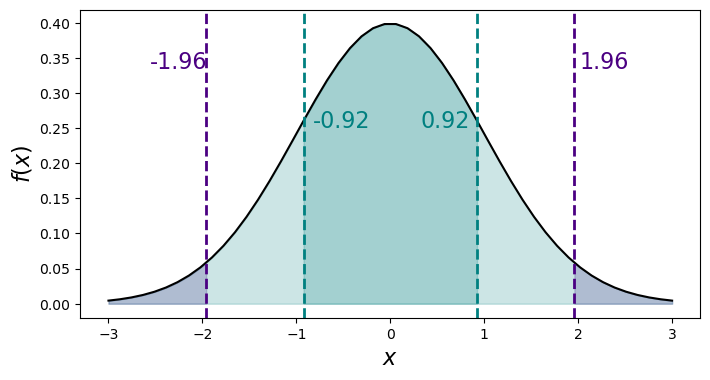

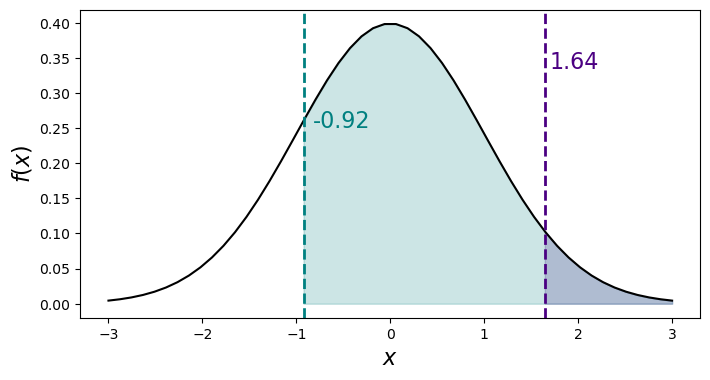

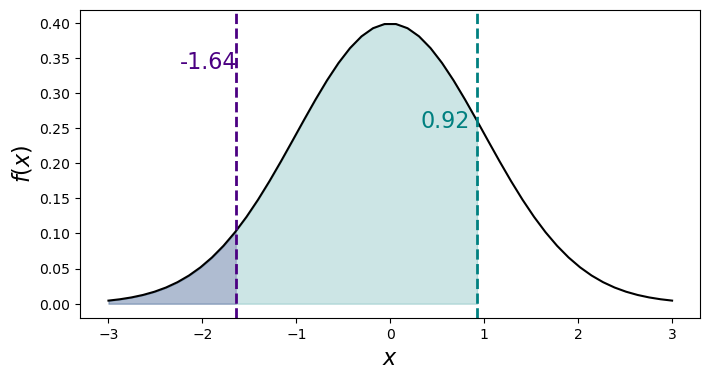

In [17]:
asy_mean_test(loc, scale)
asy_mean_test(loc, scale, alternative = 'larger')
asy_mean_test(loc, scale, alternative = 'less');

_гипотеза о равнестве математических ожиданий зп игроков, принадлежащих к разным расам не отвергается, в трех случаях альтернативных гипотез_